# Predict housing prices in Portland, Oregon.

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.
The file houses.csv contains a training set of housing prices in Portland,Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms and the third column is the price of the house.
Dataset is like below :

| Size of the house (in square feet) | Number of bedrooms | Price of the house |
|------------------------------------|--------------------|--------------------|
| 2104                               | 3                  | 399900             |
| 1600                               | 3                  | 329900             |
| 2400                               | 3                  | 369000             |


## Univariate Linear Regression

We are going to use only one variable (size) to predict prices of houses. We are going to compare the results obtained with Scikit-Learn library with those obtained with the normal equation.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#you just need to modify the access root
houses = pd.read_csv("/content/drive/MyDrive/cuatrimestres/septimo cuatrimestre/practicas/houses.csv", names=["size", "rooms", "price"])
houses.head()

,size,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
x = np.array(houses['size']).reshape(-1, 1)
y = np.array(houses['price']).reshape(-1, 1)

### Scikit-Learn

First, we fit a linear regression model and obtain the coeffcients with Scikit-Learn.

In [ ]:
lr = LinearRegression()
lr.fit(x, y)
print(lr.intercept_, lr.coef_)

[71270.49244873] [[134.52528772]]


$\hat{y} = 71270.49 + 134.53 x$

### Normal equations

Your turn now is to compute $\theta_0$ and $\theta_1$ with the normal equation for univariate linear regression.

Once you obtain those parameters compute the residuals of the training data and plot the points with the fitted line.

Mean of x: 2000.6808510638298
Sxy =  [3.90814582e+09]
Sxx = [29051384.21276595]
b0 = 71270.49244872906, b1 = 134.52528772024135


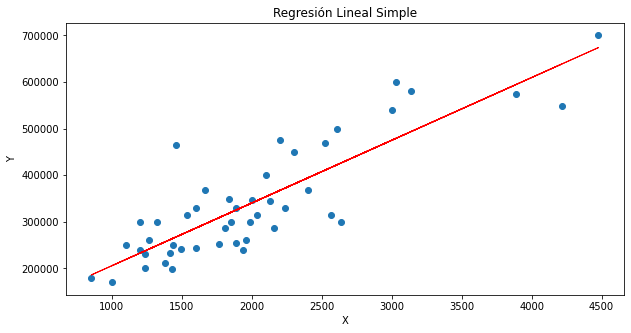

In [ ]:
import matplotlib.pyplot as plt

mean_x = x.mean()
mean_y = y.mean()

def mean(x):
    return sum(x) / float(len(x))

def sxy(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

def sxx(x, mean):
    values = x
    return sum([(x - mean)**2 for x in values])

def coefficients(x,y):
    mean_x , mean_y = x.mean(), y.mean()
    b1 = sxy(x, mean_x, y, mean_y) / sxx(x, mean_x)
    b0 = mean_y - b1 * mean_x
    return [b0, b1]

def residuals(x, b0, b1):
    y_new = []
    for i in range(len(x)):
        y = b0 + b1*x[i]
        y_new.append(y)
    return y_new

def plot_data(x, new_y, y):
    plt.figure(figsize=(10,5))
    plt.scatter(x, y)
    plt.plot(x, new_y, color='red', linewidth=1)
    plt.title('Regresión Lineal Simple')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
mean = mean(x)

print(f'Mean of x: {mean[0]}')
print(f'Sxy =  {sxy(x, mean_x, y, mean_y)}')
print(f'Sxx = {sxx(x, mean)}')
print(f'b0 = {coefficients(x,y)[0][0]}, b1 = {coefficients(x,y)[1][0]}')

b0 = coefficients(x,y)[0][0]
b1 = coefficients(x,y)[1][0]
plot_data(x,residuals(x, b0, b1),y)

### Gradient Descent for LR

Now, you should implement the gradient descent algorithm to train a simple linear regression model.

* Define a variable for the learning rate $\alpha$ and try with different values (i.e. 0.01, 0.1).
* Initialize $\theta_0$ and $\theta_1$ with random values (after it works also try initializing with zeros to see what happens).
* Define a maximum number of iterations.
* Plot the training error after each epoch (full pass over the data).
* Plot in 3D the value of $J(\theta_0, \theta_1)$ as a function of the parameters.

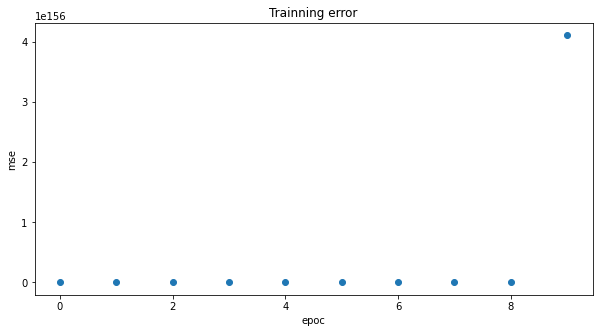

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

def gradient_descent(x, y, lr=0.05, epoch=10):
  
    m, b = 0.33, 0.48 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(x) # number of samples
    epo = []
    for epoc in range(epoch):
                
        f = y - (m*x + b)
        f = f.T
        
        # Updating m and b
        m = lr * (-2 * x.dot(f).sum() / N)
        b = lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        epo.append(epoc)
        mse.append(mean_squared_error(y, (m*x + b)))

        #m,b,log,mse
    return mse, epo

mse, epo = gradient_descent(x,y)[0], gradient_descent(x,y)[1]

def plot_trainning_error(epo, mse):
    plt.figure(figsize=(10,5))
    plt.scatter(epo, mse)
    #plt.plot(x, new_y, color='red', linewidth=1)
    plt.title('Trainning error')
    plt.xlabel('epoc')
    plt.ylabel('mse')
    plt.show()

plot_trainning_error(epo, mse)

## References 

Machine Learning course on [Coursera](https://www.coursera.org/learn/machine-learning)